In [52]:
# 라이브러리 추가
import os
import pandas as pd
import numpy as np
import re
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [53]:

os.chdir('C:\\Users\\home\\Desktop\\201821490\\3학년 2학기\\비즈니스 애널리틱스')
os.getcwd() # csv 파일을 편하게 불러오기 위해 설정

featuring = pd.read_csv('featuring.csv',encoding='cp949')
kovo = pd.read_csv('kovo.csv',encoding='cp949')
metro = pd.read_csv('metro.csv',encoding='cp949')
subway = pd.read_csv('subway.csv',encoding='cp949')
# csv 파일 불러오기

In [3]:
featuring.head() # 데이터 구조 확인

,from,to
0,아이유,G-DRAGON
1,에픽하이,아이유
2,에픽하이,오혁
3,아이유,오혁
4,HIGH4,아이유


In [ ]:
subway.head() # 데이터 구조 확인

In [28]:
# nx.pandas_edgelist를 활용하여 
graph = nx.from_pandas_edgelist(subway, 
                                 source = 'from', 
                                 target = 'to', 
                                 edge_attr = 'to',
                                 create_using = nx.DiGraph())

In [29]:
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

 

#이렇게 하면 matplotlib의 title axis의 한글이 정상적으로 나옴.

#networkx의 node의 라벨은 따로 지정을 해줘야함.

#nx.draw_networkx_labels(Gs[i],pos,Gs_label[i],font_family=font_name,font_size=10)

#출처: https://ddiri01.tistory.com/306 [처음의 마음]

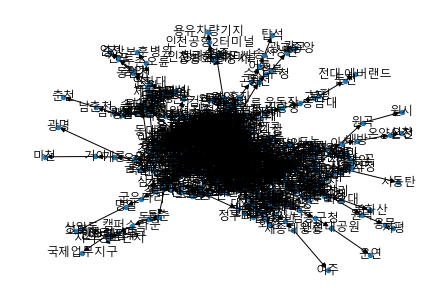

In [30]:
nx.draw(graph, font_family = font_name, with_labels = True, node_size = 20, edge_size = 30)
# 너무 많은 node 때문에 네트워크가 잘 보이지 않는다

In [55]:
# 1호선만 뽑아보기 

subway1 = subway[subway['line'] == '1'] 
subway1.head()

,from,to,line
0,소요산,동두천,1
1,동두천,보산,1
2,보산,동두천중앙,1
3,동두천중앙,지행,1
4,지행,덕정,1


In [56]:
# 1호선의 network 표시
graph1 = nx.from_pandas_edgelist(subway1, 
                                 source = 'from', 
                                 target = 'to', 
                                 edge_attr = 'to',
                                 create_using = nx.DiGraph())

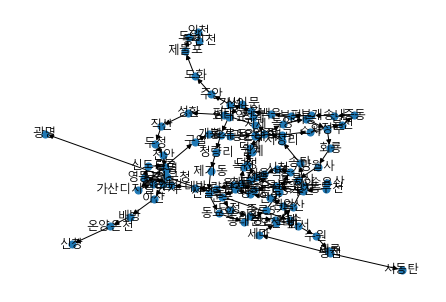

In [58]:
nx.draw(graph1, font_family = font_name, with_labels = True, node_size = 50, edge_size = 30)

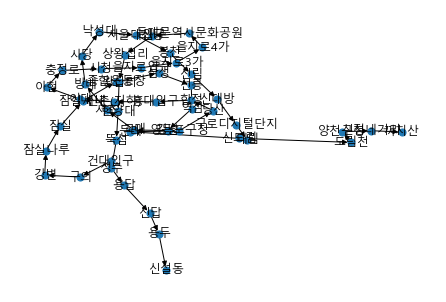

In [59]:
# 2호선 추출
subway2 = subway[subway['line'] == '2'] 

# 2호선의 network 표시
graph2 = nx.from_pandas_edgelist(subway2, 
                                 source = 'from', 
                                 target = 'to', 
                                 edge_attr = 'to',
                                 create_using = nx.DiGraph())

nx.draw(graph2, font_family = font_name, with_labels = True, node_size = 50, edge_size = 30)

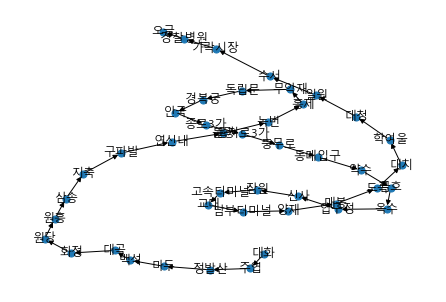

In [61]:
# 3호선 추출
subway3 = subway[subway['line'] == '3'] 

# 3호선의 network 표시
graph3 = nx.from_pandas_edgelist(subway3, 
                                 source = 'from', 
                                 target = 'to', 
                                 edge_attr = 'to',
                                 create_using = nx.DiGraph())

nx.draw(graph3, font_family = font_name, with_labels = True, node_size = 50, edge_size = 30)

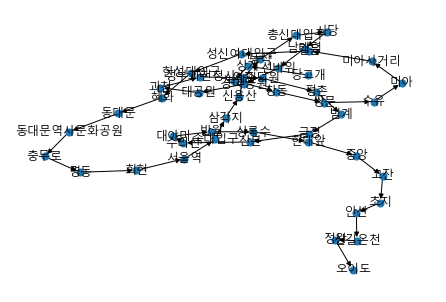

In [62]:
# 4호선 추출
subway4 = subway[subway['line'] == '4'] 

# 4호선의 network 표시
graph4 = nx.from_pandas_edgelist(subway4, 
                                 source = 'from', 
                                 target = 'to', 
                                 edge_attr = 'to',
                                 create_using = nx.DiGraph())

nx.draw(graph4, font_family = font_name, with_labels = True, node_size = 50, edge_size = 30)

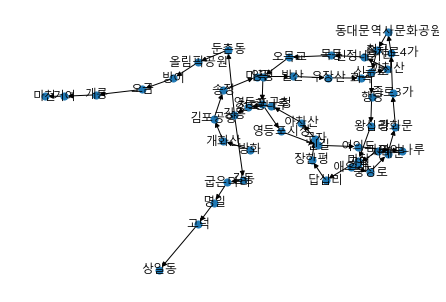

In [77]:
# 5호선 추출
subway5 = subway[subway['line'] == '5'] 

# 5호선의 network 표시
graph5 = nx.from_pandas_edgelist(subway5, 
                                 source = 'from', 
                                 target = 'to', 
                                 edge_attr = 'to',
                                 create_using = nx.DiGraph())

nx.draw(graph5, font_family = font_name, with_labels = True, node_size = 50, edge_size = 30)

- 그래프로 지하철이 가는 방향까지 나타낸걸 볼 수 있어 재밌다

## 네트워크 그래프 기본 

- 출처 : https://hodubab.tistory.com/94

In [48]:
G = nx.Graph() 

G.add_node('apple') # node apple 추가
G.add_nodes_from(['banana','kiwi','mango'])

G.nodes() # 노드들 보기 

NodeView(('apple', 'banana', 'kiwi', 'mango'))

In [60]:
relations = [('apple','mango'),('apple','kiwi')] # 관계 정의
G.add_edges_from(relations)
G.edges() # 연결 된 내용을 보여줌

EdgeView([('apple', 'mango'), ('apple', 'kiwi')])

In [ ]:
G.node['kiwi']['kind'] = 'fruit'
G.node['kiwi']

In [ ]:
G.nodes(data=True)

In [ ]:
G.add_node('kiwi', kind = 'fruit')
G.add_nodes_from(['banana', 'apple'], kind = 'fruit')
G.node['banana']

In [ ]:
G.edges()

In [ ]:
G.edges(data = True)

In [ ]:
G.add_edge('apple','mango',weight = 2.5)
G.add_edges_from(relations, color = 'blue')
G['apple']['mango']['weight'] = 5
G['apple']['kiwi']['weight'] = 2

G.edges(data = True)

노드와 엣지를 삭제하려면
- Graph.remove_node()
- Graph.remove_nodes_from()
- Graph_remove_edge() and Graph.remove_edges_from()

등을 이용하면 된다

In [ ]:
#그래프가 몇개의 노드, 엣지로 구성되어 있는지 확인
G.number_of_edges()
G.number_of_nodes()

In [ ]:
# 그래프의 엣지와 노드, 개별 쌍 확인
G.nodes()
G.edges()
G.neighbors(1) 